In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
df = pd.read_csv('./data/haberman_Cancer_Dataset.csv')
df.columns = ['patient_age', 'operation_year','position_auxillary_nodes','survival_status']


In [4]:
print(df.head())

   patient_age  operation_year  position_auxillary_nodes  survival_status
0           30              62                         3                1
1           30              65                         0                1
2           31              59                         2                1
3           31              65                         4                1
4           33              58                        10                1


In [5]:
df.shape

(305, 4)

In [6]:
df['survival_status'].value_counts()

survival_status
1    224
2     81
Name: count, dtype: int64

In [7]:
print("Mussing values in each column : \n",df.isnull().sum())

Mussing values in each column : 
 patient_age                 0
operation_year              0
position_auxillary_nodes    0
survival_status             0
dtype: int64


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   patient_age               305 non-null    int64
 1   operation_year            305 non-null    int64
 2   position_auxillary_nodes  305 non-null    int64
 3   survival_status           305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [9]:
df['survival_status'] = df['survival_status'].map({1:"yes", 2:"no"})

print(df.head())

   patient_age  operation_year  position_auxillary_nodes survival_status
0           30              62                         3             yes
1           30              65                         0             yes
2           31              59                         2             yes
3           31              65                         4             yes
4           33              58                        10             yes


In [10]:
df.describe()

,patient_age,operation_year,position_auxillary_nodes
count,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066
std,10.744024,3.254078,7.199370
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,61.000000,66.000000,4.000000
max,83.000000,69.000000,52.000000


There is a significant difference between the mean and the median values. This is because there are some outliers in our data and the mean is influenced by the presence of outliers.

In [11]:
survival_yes = df[df['survival_status'] == 'yes']
survival_no = df[df['survival_status'] == 'no']
print(survival_yes.describe())
print(survival_no.describe())

       patient_age  operation_year  position_auxillary_nodes
count   224.000000      224.000000                224.000000
mean     52.116071       62.857143                  2.799107
std      10.937446        3.229231                  5.882237
min      30.000000       58.000000                  0.000000
25%      43.000000       60.000000                  0.000000
50%      52.000000       63.000000                  0.000000
75%      60.000000       66.000000                  3.000000
max      77.000000       69.000000                 46.000000
       patient_age  operation_year  position_auxillary_nodes
count    81.000000       81.000000                 81.000000
mean     53.679012       62.827160                  7.456790
std      10.167137        3.342118                  9.185654
min      34.000000       58.000000                  0.000000
25%      46.000000       59.000000                  1.000000
50%      53.000000       63.000000                  4.000000
75%      61.000000      

Univariate Analysis : Distributio Plot

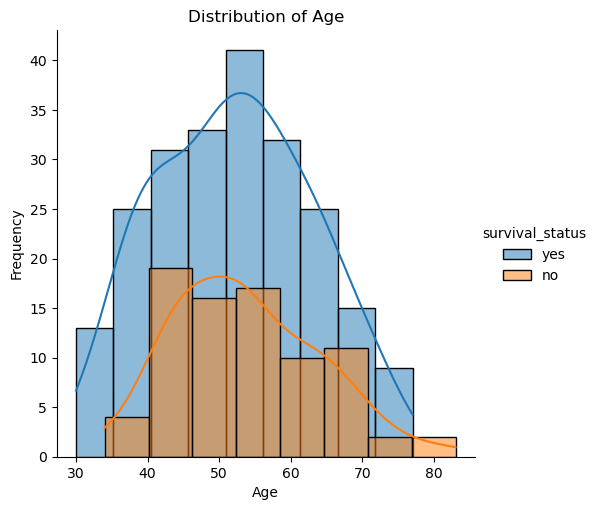

In [19]:
sns.FacetGrid(df, hue = 'survival_status',height = 5).map(sns.histplot, 'patient_age',kde = True,).add_legend()
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Kde = True : Thsi adds a Kernel Density Estimate (KDE) plot on top of the histogram which smooths the distribution

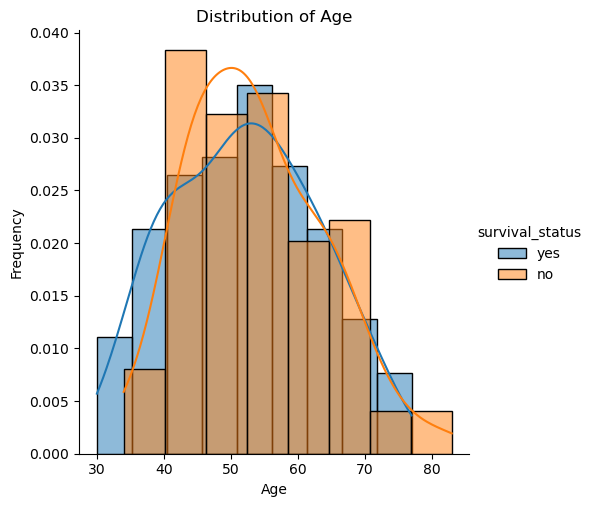

In [20]:
sns.FacetGrid(df, hue = 'survival_status',height = 5).map(sns.histplot, 'patient_age',kde = True, stat = 'density').add_legend()
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

stat = 'density' : This normalizes the histogram so that the area under the curve sums to 1. This means the y - axis will show the density, which can be interpreted as a probability density.

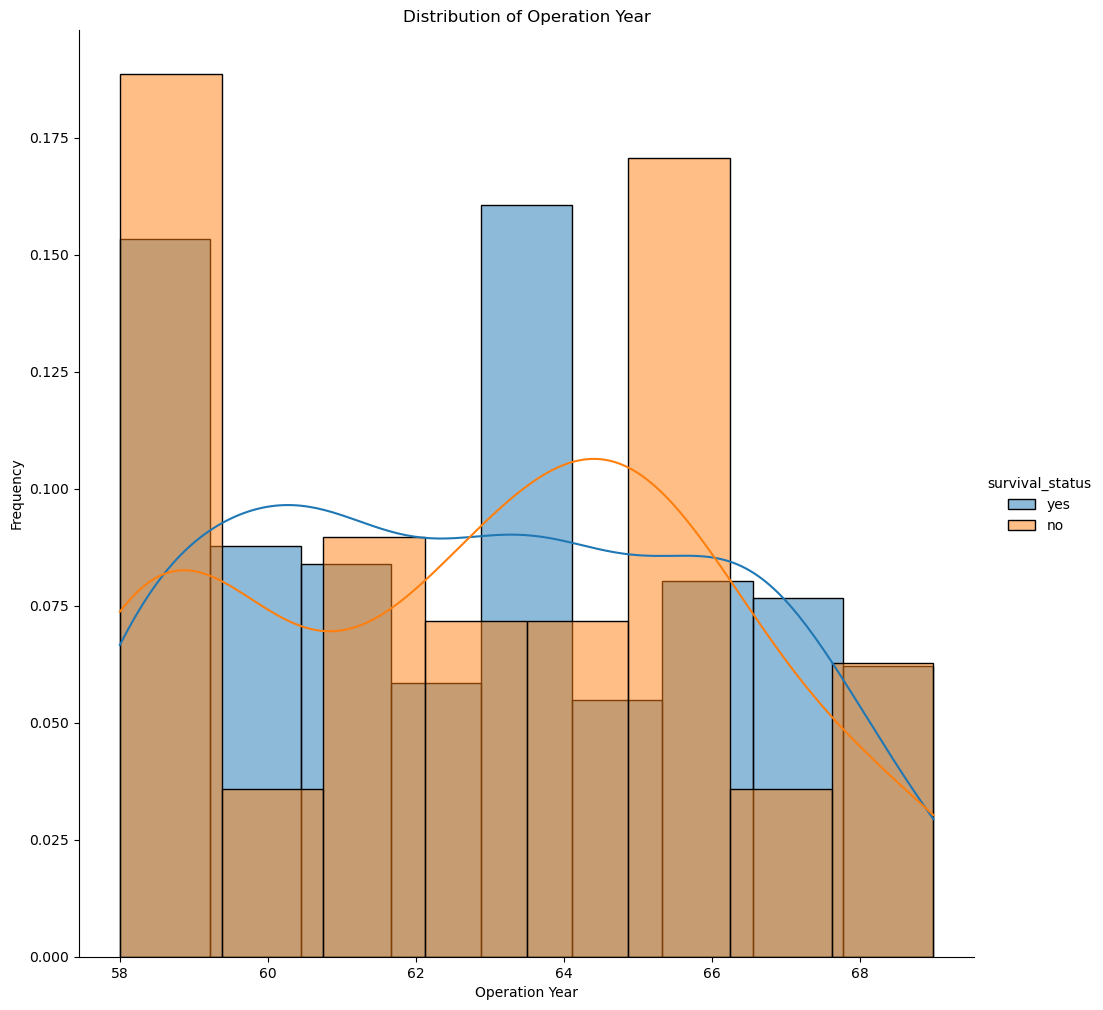

In [25]:
sns.FacetGrid(df, hue = 'survival_status',height = 10).map(sns.histplot, 'operation_year',kde = True, stat = 'density').add_legend()
plt.title('Distribution of Operation Year')
plt.xlabel('Operation Year')
plt.ylabel('Frequency')
plt.show()

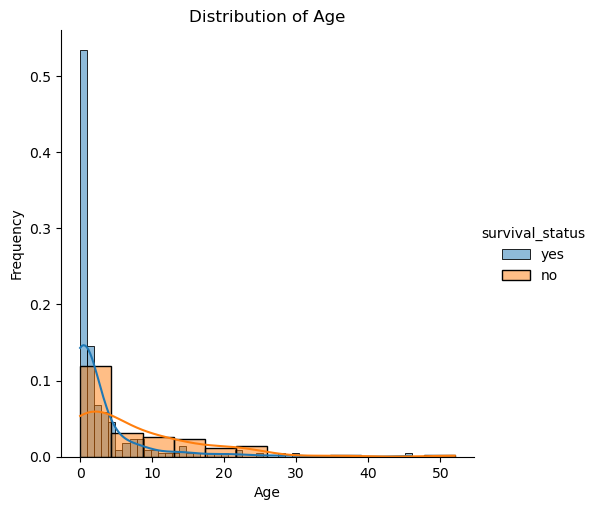

In [27]:
sns.FacetGrid(df, hue = 'survival_status',height = 5).map(sns.histplot, 'position_auxillary_nodes',kde = True, stat = 'density').add_legend()
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## Cummulative Distribution Function (CDF)

CDF plots show the probability that a variable will take a value less than or equal to a specific value. They provide a cummulative measure of the distribution. 

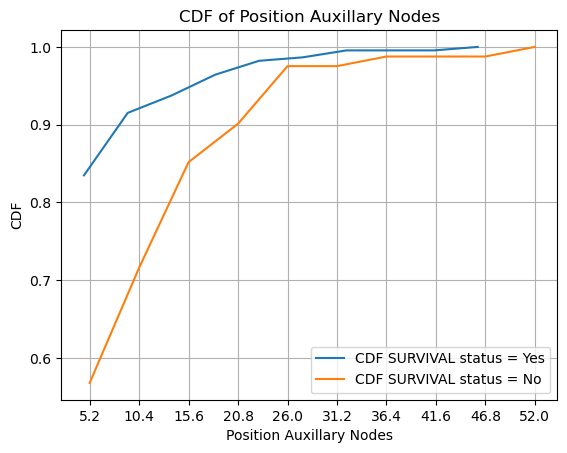

In [ ]:
counts_yes, bin_edges_yes = np.histogram(df[df['survival_status'] == 'yes']['position_auxillary_nodes'],density = True)
pdf_yes = counts_yes/sum(counts_yes)
cdf_yes = np.cumsum(pdf_yes)
plt.figure(dpi = 100)
plt.plot(bin_edges_yes[1:],cdf_yes,label = 'CDF SURVIVAL status = Yes')
plt.xticks(bin_edges_yes[1:])

counts_no, bin_edges_no = np.histogram(df[df['survival_status'] == 'no']['position_auxillary_nodes'],density = True)
pdf_no = counts_no/sum(counts_no)
cdf_no = np.cumsum(pdf_no)
plt.plot(bin_edges_no[1:],cdf_no,label = 'CDF SURVIVAL status = No')
plt.xticks(bin_edges_no[1:])
plt.legend()
plt.xlabel('Position Auxillary Nodes')
plt.ylabel('CDF')
plt.title('CDF of Position Auxillary Nodes')
plt.grid()
plt.show()

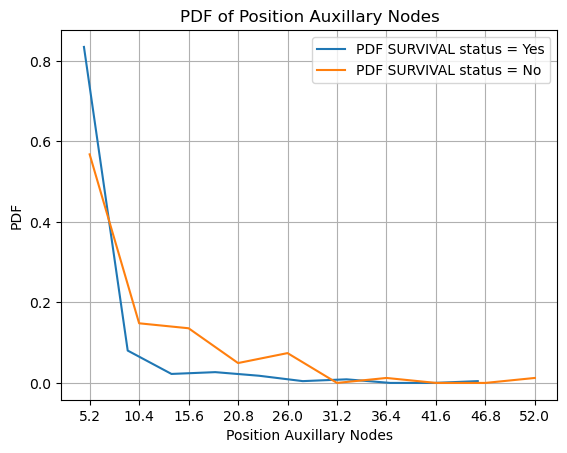

In [42]:
counts_yes, bin_edges_yes = np.histogram(df[df['survival_status'] == 'yes']['position_auxillary_nodes'],density = True)
pdf_yes = counts_yes/sum(counts_yes)
cdf_yes = np.cumsum(pdf_yes)
plt.figure(dpi = 100)
plt.plot(bin_edges_yes[1:],pdf_yes,label = 'PDF SURVIVAL status = Yes')
plt.xticks(bin_edges_yes[1:])

counts_no, bin_edges_no = np.histogram(df[df['survival_status'] == 'no']['position_auxillary_nodes'],density = True)
pdf_no = counts_no/sum(counts_no)
cdf_no = np.cumsum(pdf_no)
plt.plot(bin_edges_no[1:],pdf_no,label = 'PDF SURVIVAL status = No')
plt.xticks(bin_edges_no[1:])
plt.legend()
plt.xlabel('Position Auxillary Nodes')
plt.ylabel('PDF')
plt.title('PDF of Position Auxillary Nodes')
plt.grid()
plt.show()

## BOX PLOTS

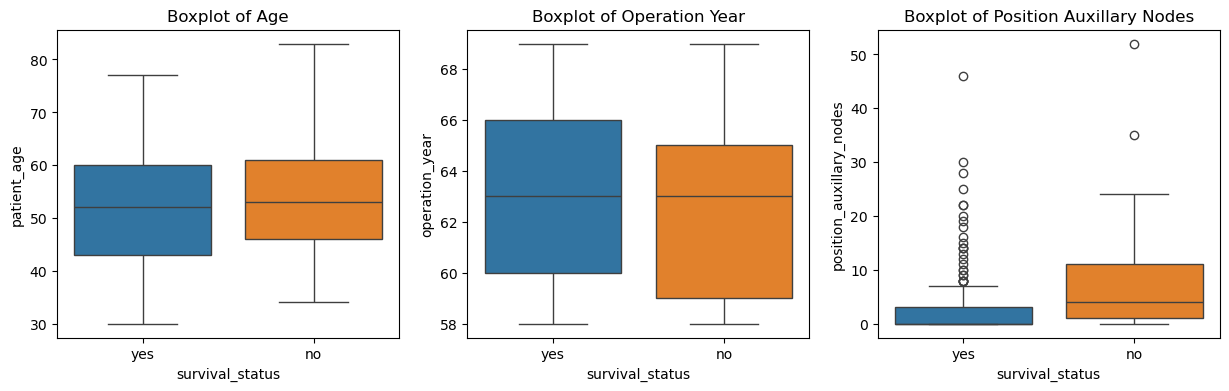

In [45]:
plt.figure(figsize = (15,4))
plt.subplot(1,3,1)
sns.boxplot(x = 'survival_status',y = 'patient_age',data = df, hue = 'survival_status')
plt.title('Boxplot of Age')
plt.subplot(1,3,2)
sns.boxplot(x = 'survival_status',y = 'operation_year',data = df, hue = 'survival_status')
plt.title('Boxplot of Operation Year')  
plt.subplot(1,3,3)
sns.boxplot(x = 'survival_status',y = 'position_auxillary_nodes',data = df, hue = 'survival_status')
plt.title('Boxplot of Position Auxillary Nodes')
plt.show()

## VIOLIN PLOTS

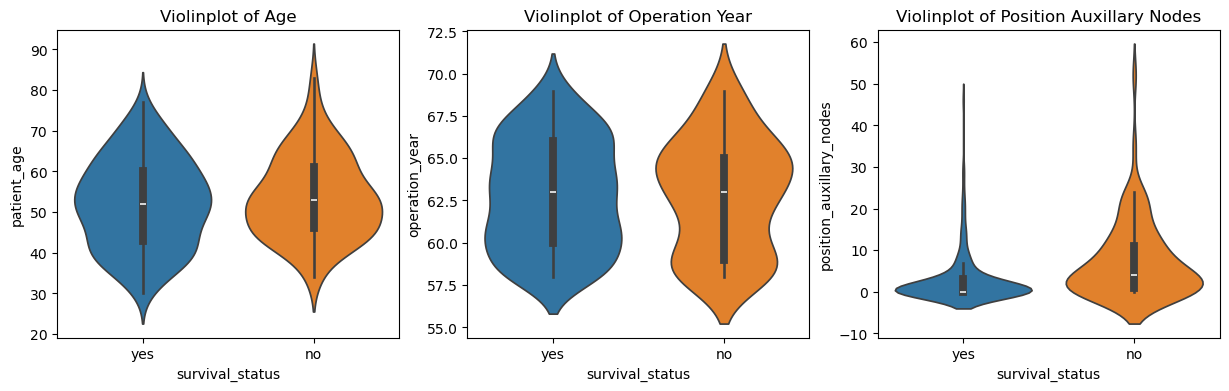

In [48]:
plt.figure(figsize = (15,4))
plt.subplot(1,3,1)
sns.violinplot(x= 'survival_status', y = 'patient_age',data = df, hue = 'survival_status')
plt.title('Violinplot of Age')
plt.subplot(1,3,2)
sns.violinplot(x= 'survival_status', y = 'operation_year', data = df , hue = 'survival_status')
plt.title('Violinplot of Operation Year')
plt.subplot(1,3,3)
sns.violinplot(x= 'survival_status', y = 'position_auxillary_nodes',data = df,  hue = 'survival_status')
plt.title('Violinplot of Position Auxillary Nodes')
plt.show()

## BAR CHARTS

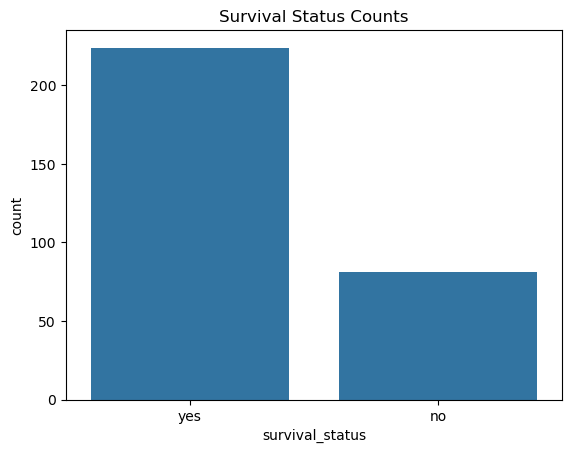

In [49]:
#Survival Status counts
sns.countplot(x = 'survival_status',data = df)
plt.title('Survival Status Counts')
plt.show()

## Histograms

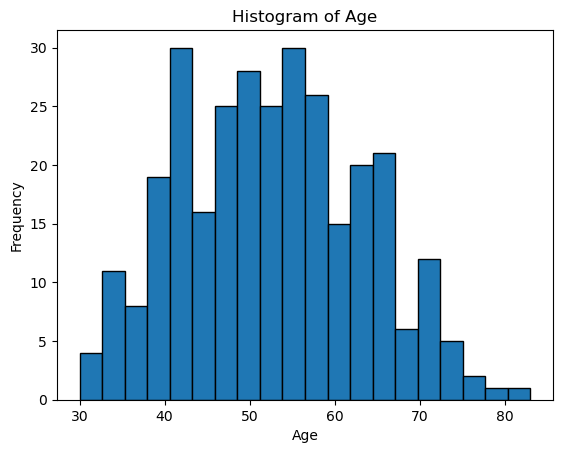

In [55]:
df['patient_age'].plot(kind = 'hist', bins = 20, edgecolor = 'black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## PAIR PLOT

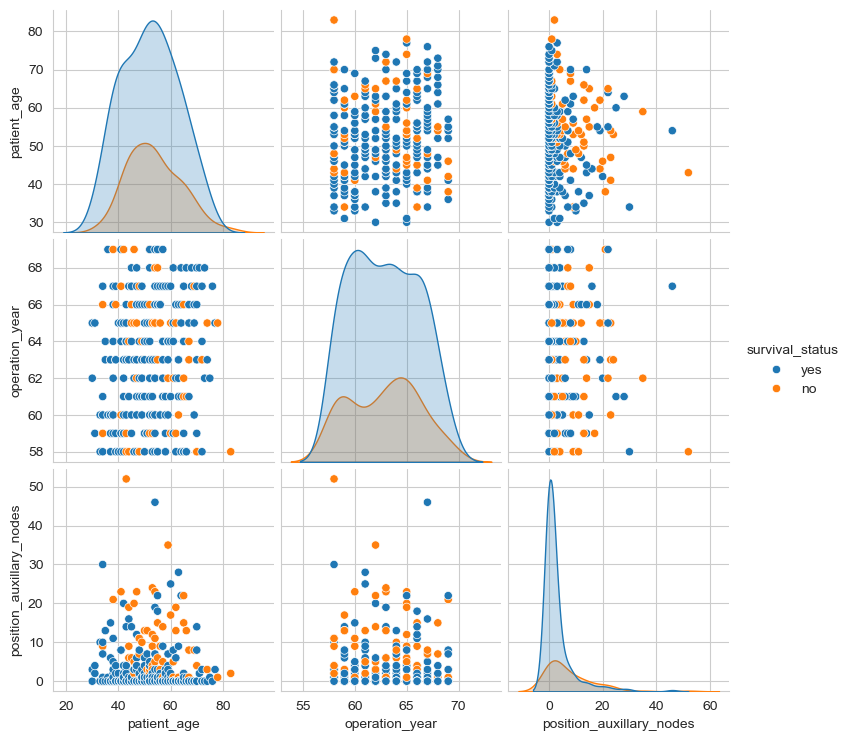

In [56]:
sns.set_style('whitegrid')
sns.pairplot(df, hue = 'survival_status')
plt.show()

## JOINT PLOT

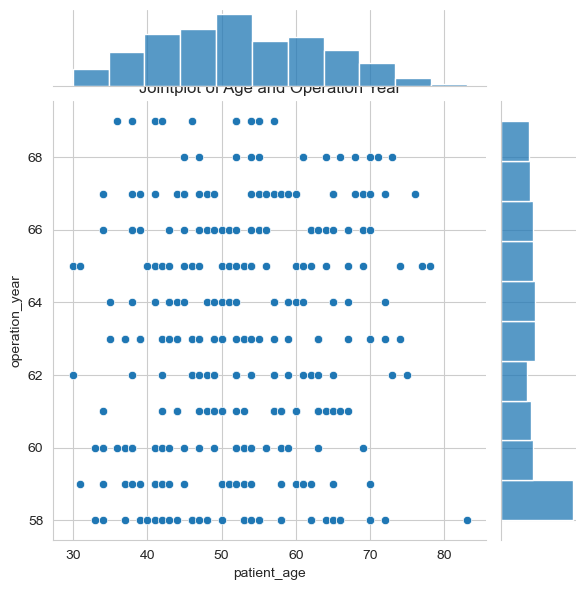

In [59]:
sns.jointplot(x = 'patient_age',y = 'operation_year',data = df, kind = 'scatter')
plt.title('Jointplot of Age and Operation Year')
plt.show()

## HeatMap

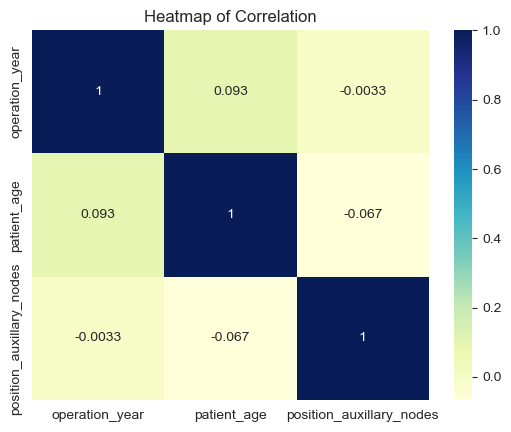

In [62]:
sns.heatmap(df[['operation_year','patient_age','position_auxillary_nodes']].corr(), cmap = 'YlGnBu', annot = True)
plt.title('Heatmap of Correlation')
plt.show()

## CONTOUR PLOT

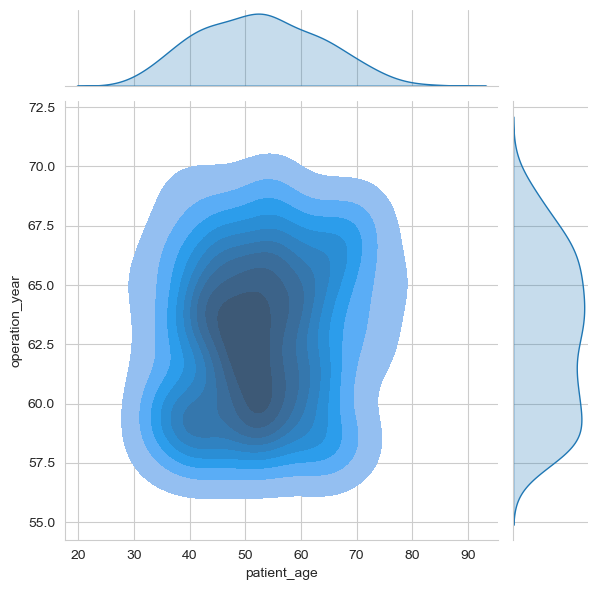

In [65]:
sns.jointplot(x = 'patient_age', y = 'operation_year', data = df,kind = 'kde', fill = True)
plt.show()

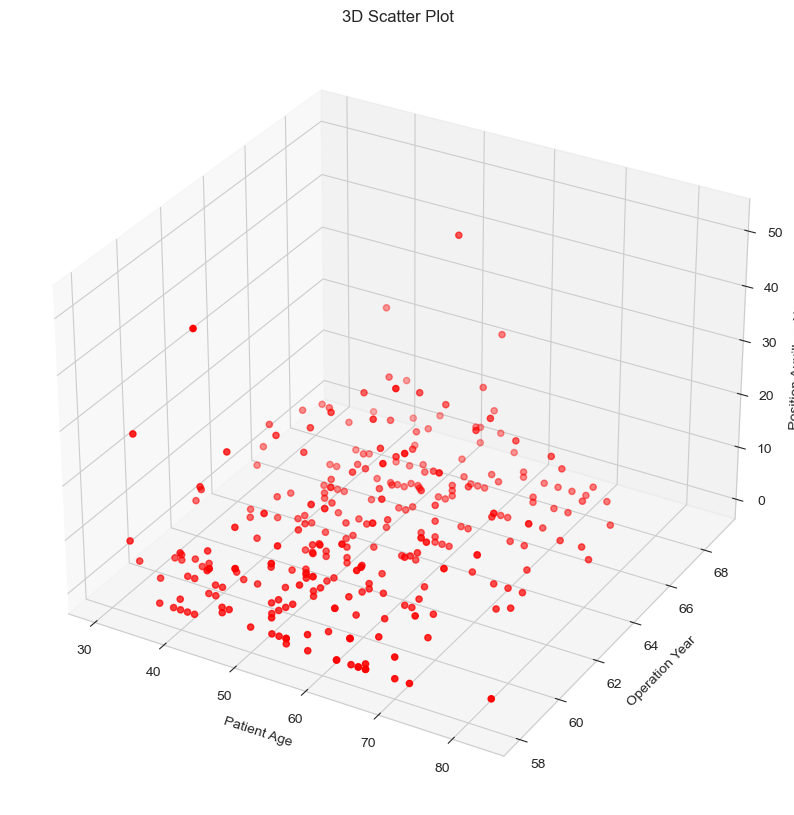

In [70]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (10,15))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df['patient_age'],df['operation_year'],df['position_auxillary_nodes'],c = 'r', marker = 'o')
ax.set_xlabel('Patient Age')
ax.set_ylabel('Operation Year')
ax.set_zlabel('Position Auxillary Nodes')
plt.title('3D Scatter Plot')
plt.show()